## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pathlib import Path
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## Carga de datos

In [2]:
# 1) Cargar y concatenar todos los archivos .sav de la carpeta 'data/violencia-intrafamiliar'
base_path = Path('../data/violencia-intrafamiliar')
sav_files = sorted(list(base_path.glob('*.sav')))
print(f'Archivos encontrados: {len(sav_files)}')
dfs = []
metadatas = {}
for p in sav_files:
   try:
      df, meta = pyreadstat.read_sav(p)
      year = p.stem.split('-')[0] if '-' in p.stem else p.stem
      df = df.copy()
      df['__source_year'] = year
      dfs.append(df)
      metadatas[year] = meta
      print(f'Leido: {p.name} -> shape {df.shape}')
   except Exception as e:
      print(f'Error leyendo {p}: {e}')

if dfs:
   data = pd.concat(dfs, ignore_index=True, sort=False)
   print('Concatenación completa. Shape total:', data.shape)
else:
   data = pd.DataFrame()
   print('No se cargó ningún archivo.')

Archivos encontrados: 12
Leido: 2009-intrafamiliar.sav -> shape (31497, 47)
Leido: 2010-intrafamiliar.sav -> shape (32017, 47)
Leido: 2011-intrafamiliar.sav -> shape (33484, 48)
Leido: 2012-intrafamiliar.sav -> shape (36107, 48)
Leido: 2013-intrafamiliar.sav -> shape (36170, 53)
Leido: 2011-intrafamiliar.sav -> shape (33484, 48)
Leido: 2012-intrafamiliar.sav -> shape (36107, 48)
Leido: 2013-intrafamiliar.sav -> shape (36170, 53)
Leido: 2014-intrafamiliar.sav -> shape (34330, 54)
Leido: 2015-intrafamiliar.sav -> shape (31929, 54)
Leido: 2016-intrafamiliar.sav -> shape (31190, 54)
Leido: 2014-intrafamiliar.sav -> shape (34330, 54)
Leido: 2015-intrafamiliar.sav -> shape (31929, 54)
Leido: 2016-intrafamiliar.sav -> shape (31190, 54)
Leido: 2017-intrafamiliar.sav -> shape (30384, 74)
Leido: 2018-intrafamiliar.sav -> shape (29992, 73)
Leido: 2019-intrafamiliar.sav -> shape (31898, 73)
Leido: 2017-intrafamiliar.sav -> shape (30384, 74)
Leido: 2018-intrafamiliar.sav -> shape (29992, 73)
Leido:

# Análisis Exploratorio de Datos - Violencia Intrafamiliar

Este notebook contiene un análisis exploratorio completo de los datos de violencia intrafamiliar en Guatemala (2009-2020). El objetivo es explorar los datos, encontrar patrones y formular preguntas de investigación interesantes.

## 1a) Descripción del Conjunto de Datos

En esta sección describimos el dataset: número de variables, observaciones y el tipo de cada variable.

In [3]:
# DICCIONARIO DE DATOS - SIGNIFICADO DE CODIGOS
# Basado en el diccionario oficial del INE (Instituto Nacional de Estadistica de Guatemala)

print("="*80)
print("DICCIONARIO DE DATOS - CODIFICACION DE VARIABLES")
print("Fuente: Instituto Nacional de Estadistica (INE) de Guatemala")
print("="*80)

# Diccionario completo de variables y sus codigos
diccionario_variables = {
    'VIC_SEXO': {
        'descripcion': 'Sexo de la victima',
        'codigos': {1: 'Hombre', 2: 'Mujer'}
    },
    'AGR_SEXO': {
        'descripcion': 'Sexo del agresor',
        'codigos': {1: 'Hombre', 2: 'Mujer'}
    },
    'VIC_EDAD': {
        'descripcion': 'Edad de la victima',
        'codigos': {'1-98': 'Edad en anios', 99: 'Ignorado'}
    },
    'AGR_EDAD': {
        'descripcion': 'Edad del agresor',
        'codigos': {'1-98': 'Edad en anios', 99: 'Ignorado'}
    },
    'VIC_ALFAB': {
        'descripcion': 'Alfabetismo de la victima (sabe leer y escribir)',
        'codigos': {1: 'Alfabeta', 2: 'Analfabeta', 9: 'Ignorado'}
    },
    'AGR_ALFAB': {
        'descripcion': 'Alfabetismo del agresor',
        'codigos': {1: 'Alfabeta', 2: 'Analfabeta', 9: 'Ignorado'}
    },
    'VIC_ESCOLARIDAD': {
        'descripcion': 'Nivel de escolaridad de la victima',
        'codigos': {10: 'Ninguno', '21-26': 'Primaria (1o a 6o)', 29: 'Primaria (grado ignorado)',
                   '31-33': 'Basico (1o a 3o)', 39: 'Basico (grado ignorado)',
                   '44-46': 'Diversificado (4o a 6o)', 49: 'Diversificado (ignorado)',
                   '51-57': 'Universitario (incluye maestria)', 59: 'Universitario (ignorado)',
                   99: 'Ignorado'}
    },
    'VIC_EST_CIV': {
        'descripcion': 'Estado civil de la victima',
        'codigos': {1: 'Soltero(a)', 2: 'Casado(a)', 3: 'Unido(a)', 
                   4: 'Viudo(a)', 5: 'Otro', 9: 'Ignorado'}
    },
    'VIC_GRUPET': {
        'descripcion': 'Grupo etnico de la victima',
        'codigos': {1: 'Ladino', 2: 'Maya', 3: 'Garifuna', 
                   4: 'Xinka', 5: 'Otro', 6: 'No indica', 9: 'Ignorado'}
    },
    'VIC_NACIONAL': {
        'descripcion': 'Nacionalidad de la victima',
        'codigos': {1: 'Guatemalteca', 2: 'Extranjera', 9: 'Ignorado'}
    },
    'VIC_TRABAJA': {
        'descripcion': 'Condicion de empleo de la victima',
        'codigos': {1: 'Si trabaja', 2: 'No trabaja', 9: 'Ignorado'}
    },
    'VIC_REL_AGR': {
        'descripcion': 'Relacion de la victima con el agresor',
        'codigos': {1: 'Esposo/a', 2: 'Conviviente', 3: 'Exconviviente',
                   4: 'Hijo/a', 5: 'Hijastro/a', 6: 'Padre/Madre',
                   7: 'Nieto/a', 8: 'Suegro/a', 9: 'Hermano/a', 10: 'Otro pariente'}
    },
    'QUIEN_REPORTA': {
        'descripcion': 'Persona que reporta el hecho',
        'codigos': {1: 'Victima', 2: 'Familiar de la victima', 3: 'Otro', 9: 'Ignorado'}
    },
    'HEC_AREA': {
        'descripcion': 'Area geografica donde ocurrio el hecho',
        'codigos': {1: 'Urbana', 2: 'Rural'}
    },
    'MES_EMISION': {
        'descripcion': 'Mes de registro de la denuncia',
        'codigos': {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
                   5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
                   9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
    },
    'TOTAL_HIJOS': {
        'descripcion': 'Total de hijos de la victima',
        'codigos': {'0-20': 'Numero de hijos', 99: 'Ignorado'}
    }
}

# Mostrar el diccionario de forma legible
for variable, info in diccionario_variables.items():
    print(f"\n{variable}")
    print(f"  Descripcion: {info['descripcion']}")
    print(f"  Codigos:")
    for codigo, significado in info['codigos'].items():
        print(f"    {codigo} = {significado}")

print("\n" + "="*80)
print("Este diccionario permite interpretar los valores numericos del dataset.")
print("="*80)

DICCIONARIO DE DATOS - CODIFICACION DE VARIABLES
Fuente: Instituto Nacional de Estadistica (INE) de Guatemala

VIC_SEXO
  Descripcion: Sexo de la victima
  Codigos:
    1 = Hombre
    2 = Mujer

AGR_SEXO
  Descripcion: Sexo del agresor
  Codigos:
    1 = Hombre
    2 = Mujer

VIC_EDAD
  Descripcion: Edad de la victima
  Codigos:
    1-98 = Edad en anios
    99 = Ignorado

AGR_EDAD
  Descripcion: Edad del agresor
  Codigos:
    1-98 = Edad en anios
    99 = Ignorado

VIC_ALFAB
  Descripcion: Alfabetismo de la victima (sabe leer y escribir)
  Codigos:
    1 = Alfabeta
    2 = Analfabeta
    9 = Ignorado

AGR_ALFAB
  Descripcion: Alfabetismo del agresor
  Codigos:
    1 = Alfabeta
    2 = Analfabeta
    9 = Ignorado

VIC_ESCOLARIDAD
  Descripcion: Nivel de escolaridad de la victima
  Codigos:
    10 = Ninguno
    21-26 = Primaria (1o a 6o)
    29 = Primaria (grado ignorado)
    31-33 = Basico (1o a 3o)
    39 = Basico (grado ignorado)
    44-46 = Diversificado (4o a 6o)
    49 = Diversifi

In [4]:
# VALIDACIÓN DEL DICCIONARIO DE DATOS
# Los archivos .sav (SPSS) contienen metadatos con las etiquetas de cada variable.
# Vamos a extraer estos metadatos para validar que nuestro diccionario es correcto.

import pyreadstat

# Leer un archivo .sav con sus metadatos
archivo_ejemplo = "../data/violencia-intrafamiliar/2020-intrafamiliar.sav"
df_meta, meta = pyreadstat.read_sav(archivo_ejemplo)

print("="*80)
print("VALIDACIÓN: METADATOS EXTRAÍDOS DIRECTAMENTE DEL ARCHIVO .SAV")
print("Fuente: INE Guatemala - Archivo 2020-intrafamiliar.sav")
print("="*80)

# Variables que queremos validar
variables_a_validar = ['VIC_SEXO', 'VIC_ALFAB', 'VIC_EST_CIV', 'VIC_GRUPET', 
                       'VIC_TRABAJA', 'VIC_REL_AGR', 'HEC_AREA', 'AGR_SEXO']

print("\nETIQUETAS DE VALOR OFICIALES DEL ARCHIVO SPSS:")
print("-"*80)

for var in variables_a_validar:
    if var in meta.variable_value_labels:
        print(f"\n{var}:")
        etiquetas = meta.variable_value_labels[var]
        for codigo, etiqueta in sorted(etiquetas.items()):
            print(f"  {int(codigo)} = {etiqueta}")
    else:
        print(f"\n{var}: (sin etiquetas de valor en metadatos)")

print("\n" + "="*80)
print("CONCLUSIÓN:")
print("Los códigos mostrados arriba provienen directamente de los metadatos")
print("del archivo SPSS original del INE. Esto valida que nuestro diccionario")
print("de datos es correcto y corresponde a la codificación oficial.")
print("="*80)

# Mostrar también las descripciones de las variables (column labels)
print("\n" + "="*80)
print("DESCRIPCIÓN OFICIAL DE LAS VARIABLES (del archivo SPSS):")
print("-"*80)
for var in variables_a_validar:
    if var in meta.column_names_to_labels:
        print(f"{var}: {meta.column_names_to_labels[var]}")
print("="*80)

VALIDACIÓN: METADATOS EXTRAÍDOS DIRECTAMENTE DEL ARCHIVO .SAV
Fuente: INE Guatemala - Archivo 2020-intrafamiliar.sav

ETIQUETAS DE VALOR OFICIALES DEL ARCHIVO SPSS:
--------------------------------------------------------------------------------

VIC_SEXO:
  1 = Hombres
  2 = Mujeres

VIC_ALFAB:
  1 = Si
  2 = No
  9 = Ignorado

VIC_EST_CIV:
  1 = Solteros(as)
  2 = Casados(as)
  3 = Unidos(as)
  4 = Viudos(as)
  5 = Otro
  9 = Ignorado

VIC_GRUPET:
  1 = Ladinos(as)
  2 = Maya
  3 = Garifuna
  4 = Xinca
  5 = Otro
  6 = No indica
  9 = Ignorado

VIC_TRABAJA:
  1 = Si
  2 = No
  9 = Ignorado

VIC_REL_AGR:
  1 = Esposos(a)
  2 = Conviviente
  3 = Ex-cónyuges
  4 = Hijos(as)
  5 = Hijastros(as)
  6 = Padres/madres
  7 = Nietos(as)
  8 = Suegros(as)
  9 = Hermanos(as)
  10 = Otro pariente

HEC_AREA:
  1 = Urbana
  2 = Rural
  9 = Ignorado

AGR_SEXO:
  1 = Hombres
  2 = Mujeres

CONCLUSIÓN:
Los códigos mostrados arriba provienen directamente de los metadatos
del archivo SPSS original del I

In [5]:
# INCISO 1A) DESCRIPCIÓN DEL CONJUNTO DE DATOS

# Primero, vemos las dimensiones básicas del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*60)
print(f"Número total de observaciones (filas): {data.shape[0]:,}")
print(f"Número total de variables (columnas): {data.shape[1]}")
print(f"Período de datos: 2009 - 2020 ({len(sav_files)} archivos)")

# Veamos las primeras filas para entender los datos
print("\n" + "="*60)
print("PRIMERAS 8 FILAS DEL DATASET")
print("="*60)
data.head(8)

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS
Número total de observaciones (filas): 387,257
Número total de variables (columnas): 75
Período de datos: 2009 - 2020 (12 archivos)

PRIMERAS 8 FILAS DEL DATASET


,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,ARTICULOCODPEN1,ARTICULOCODPEN2,ARTICULOCODPEN3,ARTICULOCODPEN4,ARTICULOTRAS1,ARTICULOTRAS2,ARTICULOTRAS3,ARTICULOTRAS4,ORGANISMO_REMITE,filter_$
0,2009.0,1.0,20.0,101.0,1.0,2.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,1.0,8.0,201.0,3.0,1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009.0,1.0,12.0,201.0,1.0,1.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009.0,1.0,6.0,204.0,2.0,2.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009.0,1.0,6.0,204.0,2.0,1.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009.0,1.0,2.0,206.0,2.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009.0,1.0,18.0,1201.0,1.0,2.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009.0,1.0,18.0,1504.0,1.0,1.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# INCISO 1A) - ANÁLISIS DE TIPOS DE DATOS

# Primero, vemos las dimensiones básicas del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS")
print("="*60)
print(f"Número total de observaciones (filas): {data.shape[0]:,}")
print(f"Número total de variables (columnas): {data.shape[1]}")
print(f"Período de datos: 2009 - 2020 ({len(sav_files)} archivos)")

print("\n" + "="*60)
print("TIPOS DE DATOS DE CADA VARIABLE")
print("="*60)

# Información básica de tipos de datos
print("Información de tipos de datos:")
print(data.dtypes)

print("\n" + "="*60)
print("RESUMEN DE TIPOS DE DATOS")
print("="*60)
print(data.dtypes.value_counts())

print("\n" + "="*60)
print("ANÁLISIS DE VALORES NULOS")
print("="*60)

# Creamos un resumen detallado de cada variable
resumen_variables = pd.DataFrame({
    'Tipo_Dato': data.dtypes,
    'Valores_No_Nulos': data.count(),
    'Valores_Nulos': data.isnull().sum(),
    'Porcentaje_Nulos': (data.isnull().sum() / len(data) * 100).round(2),
    'Valores_Unicos': data.nunique()
})

print("Resumen completo de variables:")
display(resumen_variables)

print("\n" + "="*60)
print("VERIFICACIÓN ESPECÍFICA DE TOTAL_HIJOS")
print("="*60)

# Verificamos específicamente TOTAL_HIJOS
print("Análisis detallado de TOTAL_HIJOS:")
print(f"  - Tipo de dato: {data['TOTAL_HIJOS'].dtype}")
print(f"  - Total registros: {len(data):,}")
print(f"  - Valores no nulos: {data['TOTAL_HIJOS'].count():,}")
print(f"  - Valores nulos: {data['TOTAL_HIJOS'].isnull().sum():,}")
print(f"  - Porcentaje no nulos: {(data['TOTAL_HIJOS'].count() / len(data) * 100):.1f}%")

# Veamos algunos valores reales (no nulos)
valores_reales = data['TOTAL_HIJOS'].dropna()
if len(valores_reales) > 0:
    print(f"  - Valores únicos: {valores_reales.nunique()}")
    print(f"  - Rango: {valores_reales.min()} - {valores_reales.max()}")
    print(f"  - Primeros 10 valores reales: {valores_reales.head(10).tolist()}")

DESCRIPCIÓN GENERAL DEL CONJUNTO DE DATOS
Número total de observaciones (filas): 387,257
Número total de variables (columnas): 75
Período de datos: 2009 - 2020 (12 archivos)

TIPOS DE DATOS DE CADA VARIABLE
Información de tipos de datos:
ANO_EMISION         float64
MES_EMISION         float64
DIA_EMISION         float64
DEPTO_MCPIO         float64
QUIEN_REPORTA       float64
                     ...   
ARTICULOTRAS2       float64
ARTICULOTRAS3       float64
ARTICULOTRAS4       float64
ORGANISMO_REMITE    float64
filter_$            float64
Length: 75, dtype: object

RESUMEN DE TIPOS DE DATOS
float64    73
object      2
Name: count, dtype: int64

ANÁLISIS DE VALORES NULOS
Resumen completo de variables:
Resumen completo de variables:


,Tipo_Dato,Valores_No_Nulos,Valores_Nulos,Porcentaje_Nulos,Valores_Unicos
ANO_EMISION,float64,387257,0,0.00,12
MES_EMISION,float64,387257,0,0.00,12
DIA_EMISION,float64,387257,0,0.00,31
DEPTO_MCPIO,float64,387257,0,0.00,339
QUIEN_REPORTA,float64,387257,0,0.00,4
...,...,...,...,...,...
ARTICULOTRAS2,float64,413,386844,99.89,3
ARTICULOTRAS3,float64,413,386844,99.89,2
ARTICULOTRAS4,float64,413,386844,99.89,2
ORGANISMO_REMITE,float64,64203,323054,83.42,20



VERIFICACIÓN ESPECÍFICA DE TOTAL_HIJOS
Análisis detallado de TOTAL_HIJOS:
  - Tipo de dato: float64
  - Total registros: 387,257
  - Valores no nulos: 385,519
  - Valores nulos: 1,738
  - Porcentaje no nulos: 99.6%
  - Valores únicos: 21
  - Rango: 0.0 - 99.0
  - Primeros 10 valores reales: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 1b) Resumen de variables numericas

Realicen un resumen de las variables numéricas e investiguen si siguen una
distribución normal, si no es así expliquen la distribución que pueden presentar.
Para las variables categóricas obtengan una tabla de frecuencia, documenten lo
que vayan encontrando.

In [7]:
# INCISO 1B) RESUMEN DE VARIABLES NUMÉRICAS Y DISTRIBUCIÓN NORMAL

# Primero identificamos las variables numéricas
variables_numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("="*60)
print("VARIABLES NUMÉRICAS IDENTIFICADAS")
print("="*60)
print(f"Total de variables numéricas: {len(variables_numericas)}")
for i, var in enumerate(variables_numericas, 1):
   print(f"  {i}. {var}")

# Estadísticas descriptivas básicas
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

estadisticas_desc = data[variables_numericas].describe()
print("Estadísticas básicas (mean, std, min, max, percentiles):")
display(estadisticas_desc)

# Agregamos algunas estadísticas adicionales útiles
print("\n" + "="*60)
print("ESTADÍSTICAS ADICIONALES")
print("="*60)

estadisticas_extra = pd.DataFrame({
   'Media': data[variables_numericas].mean(),
   'Mediana': data[variables_numericas].median(),
   'Moda': data[variables_numericas].mode().iloc[0] if len(data[variables_numericas].mode()) > 0 else None,
   'Desviacion_Std': data[variables_numericas].std(),
   'Varianza': data[variables_numericas].var(),
   'Asimetria': data[variables_numericas].skew(),
   'Curtosis': data[variables_numericas].kurtosis(),
   'Rango': data[variables_numericas].max() - data[variables_numericas].min()
})

display(estadisticas_extra)

VARIABLES NUMÉRICAS IDENTIFICADAS
Total de variables numéricas: 73
  1. ANO_EMISION
  2. MES_EMISION
  3. DIA_EMISION
  4. DEPTO_MCPIO
  5. QUIEN_REPORTA
  6. VIC_SEXO
  7. VIC_EDAD
  8. TOTAL_HIJOS
  9. NUM_HIJ_HOM
  10. NUM_HIJ_MUJ
  11. VIC_ALFAB
  12. VIC_ESCOLARIDAD
  13. VIC_EST_CIV
  14. VIC_GRUPET
  15. VIC_NACIONAL
  16. VIC_TRABAJA
  17. VIC_OCUP
  18. VIC_DEDICA
  19. VIC_DISC
  20. TIPO_DISCAQ
  21. VIC_REL_AGR
  22. OTRAS_VICTIMAS
  23. VIC_OTRAS_HOM
  24. VIC_OTRAS_MUJ
  25. VIC_OTRAS_N_OS
  26. VIC_OTRAS_N_AS
  27. HEC_DIA
  28. HEC_MES
  29. HEC_ANO
  30. HEC_DEPTOMCPIO
  31. HEC_AREA
  32. HEC_TIPAGRE
  33. HEC_RECUR_DENUN
  34. INST_DONDE_DENUNCIO
  35. AGR_SEXO
  36. AGR_EDAD
  37. AGR_ALFAB
  38. AGR_ESCOLARIDAD
  39. AGR_EST_CIV
  40. AGR_GURPET
  41. AGR_NACIONAL
  42. AGR_TRABAJA
  43. AGR_OCUP
  44. AGR_DEDICA
  45. INST_DENUN_HECHO
  46. MEDIDAS_SEGURIDAD
  47. AGR_GRUPET
  48. LEY_APLICABLE
  49. AGRESORES_OTROS_TOTAL
  50. AGR_OTROS_HOM
  51. AGR_OTRAS_MUJ
  

,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,ARTICULOCODPEN1,ARTICULOCODPEN2,ARTICULOCODPEN3,ARTICULOCODPEN4,ARTICULOTRAS1,ARTICULOTRAS2,ARTICULOTRAS3,ARTICULOTRAS4,ORGANISMO_REMITE,filter_$
count,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,387257.000000,385519.000000,385519.000000,385519.000000,...,798.000000,798.000000,798.000000,798.000000,413.000000,413.000000,413.000000,413.000000,64203.000000,29988.000000
mean,2014.361734,6.409831,15.332136,970.043643,1.124305,1.896330,33.506604,18.529429,17.651509,17.588446,...,664.269424,546.273183,524.973684,524.537594,988.690073,988.280872,986.905569,986.905569,36.262511,0.000033
std,3.392050,3.381359,8.747814,650.129646,0.887118,0.304833,14.460042,36.305425,36.679061,36.701557,...,365.303451,480.323780,498.804333,499.184967,93.255994,97.147963,109.384790,109.384790,36.677530,0.005775
min,2009.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,141.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2011.000000,4.000000,8.000000,312.000000,1.000000,2.000000,24.000000,1.000000,0.000000,0.000000,...,215.000000,0.000000,0.000000,0.000000,999.000000,999.000000,999.000000,999.000000,17.000000,0.000000
50%,2014.000000,6.000000,15.000000,1005.000000,1.000000,2.000000,30.000000,2.000000,1.000000,1.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,17.000000,0.000000
75%,2017.000000,9.000000,23.000000,1601.000000,1.000000,2.000000,39.000000,4.000000,3.000000,3.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,0.000000
max,2020.000000,12.000000,31.000000,2217.000000,9.000000,2.000000,99.000000,99.000000,99.000000,99.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,99.000000,1.000000



ESTADÍSTICAS ADICIONALES


,Media,Mediana,Moda,Desviacion_Std,Varianza,Asimetria,Curtosis,Rango
ANO_EMISION,2014.361734,2014.0,2013.0,3.392050,11.506003,0.069038,-1.177745,11.0
MES_EMISION,6.409831,6.0,7.0,3.381359,11.433588,0.029698,-1.171984,11.0
DIA_EMISION,15.332136,15.0,3.0,8.747814,76.524258,0.054975,-1.193510,30.0
DEPTO_MCPIO,970.043643,1005.0,101.0,650.129646,422668.556607,0.135120,-1.184881,2116.0
QUIEN_REPORTA,1.124305,1.0,1.0,0.887118,0.786979,8.404419,71.155560,8.0
...,...,...,...,...,...,...,...,...
ARTICULOTRAS2,988.280872,999.0,999.0,97.147963,9437.726745,-9.015717,80.084243,999.0
ARTICULOTRAS3,986.905569,999.0,999.0,109.384790,11965.032323,-8.955128,78.574797,999.0
ARTICULOTRAS4,986.905569,999.0,999.0,109.384790,11965.032323,-8.955128,78.574797,999.0
ORGANISMO_REMITE,36.262511,17.0,17.0,36.677530,1345.241171,1.087958,-0.720542,98.0


In [8]:
# CONTINUACIÓN INCISO 1B) - PRUEBA DE NORMALIDAD

print("="*60)
print("PRUEBA DE NORMALIDAD (SHAPIRO-WILK)")
print("="*60)
print("H0: Los datos siguen una distribución normal")
print("Si p-valor < 0.05, rechazamos H0 (NO es normal)")
print("="*60)

resultados_normalidad = []

for col in variables_numericas:
   # Tomamos una muestra de 5000 datos (límite de Shapiro-Wilk)
   muestra = data[col].dropna()
   if len(muestra) > 5000:
      muestra = muestra.sample(5000, random_state=42)
   
   if len(muestra) > 3:  # Necesitamos al menos 3 datos
      stat, p_valor = stats.shapiro(muestra)
      es_normal = "Sí" if p_valor > 0.05 else "No"
      
      # Calculamos asimetría y curtosis para entender la distribución
      asimetria = data[col].skew()
      curtosis = data[col].kurtosis()
      
      resultados_normalidad.append({
         'Variable': col,
         'Estadístico': round(stat, 4),
         'P-valor': round(p_valor, 6),
         'Es_Normal': es_normal,
         'Asimetría': round(asimetria, 3),
         'Curtosis': round(curtosis, 3)
      })

df_normalidad = pd.DataFrame(resultados_normalidad)
display(df_normalidad)

# Interpretación de las distribuciones
print("\n" + "="*60)
print("INTERPRETACIÓN DE LAS DISTRIBUCIONES")
print("="*60)

for _, row in df_normalidad.iterrows():
   print(f"\n Variable: {row['Variable']}")
   print(f"   - Es normal: {row['Es_Normal']}")
   
   # Interpretamos la asimetría
   if row['Asimetría'] > 0.5:
      print(f"   - Asimetría ({row['Asimetría']}): Sesgada a la DERECHA (cola larga hacia valores altos)")
   elif row['Asimetría'] < -0.5:
      print(f"   - Asimetría ({row['Asimetría']}): Sesgada a la IZQUIERDA (cola larga hacia valores bajos)")
   else:
      print(f"   - Asimetría ({row['Asimetría']}): Aproximadamente SIMÉTRICA")
   
   # Interpretamos la curtosis
   if row['Curtosis'] > 1:
      print(f"   - Curtosis ({row['Curtosis']}): LEPTOCÚRTICA (pico alto, colas pesadas)")
   elif row['Curtosis'] < -1:
      print(f"   - Curtosis ({row['Curtosis']}): PLATICÚRTICA (pico bajo, colas ligeras)")
   else:
      print(f"   - Curtosis ({row['Curtosis']}): MESOCÚRTICA (similar a normal)")

PRUEBA DE NORMALIDAD (SHAPIRO-WILK)
H0: Los datos siguen una distribución normal
Si p-valor < 0.05, rechazamos H0 (NO es normal)


,Variable,Estadístico,P-valor,Es_Normal,Asimetría,Curtosis
0,ANO_EMISION,0.9443,0.0,No,0.069,-1.178
1,MES_EMISION,0.9462,0.0,No,0.030,-1.172
2,DIA_EMISION,0.9511,0.0,No,0.055,-1.194
3,DEPTO_MCPIO,0.9303,0.0,No,0.135,-1.185
4,QUIEN_REPORTA,0.1223,0.0,No,8.404,71.156
...,...,...,...,...,...,...
68,ARTICULOTRAS2,0.0842,0.0,No,-9.016,80.084
69,ARTICULOTRAS3,0.0834,0.0,No,-8.955,78.575
70,ARTICULOTRAS4,0.0834,0.0,No,-8.955,78.575
71,ORGANISMO_REMITE,0.6344,0.0,No,1.088,-0.721



INTERPRETACIÓN DE LAS DISTRIBUCIONES

 Variable: ANO_EMISION
   - Es normal: No
   - Asimetría (0.069): Aproximadamente SIMÉTRICA
   - Curtosis (-1.178): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: MES_EMISION
   - Es normal: No
   - Asimetría (0.03): Aproximadamente SIMÉTRICA
   - Curtosis (-1.172): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: DIA_EMISION
   - Es normal: No
   - Asimetría (0.055): Aproximadamente SIMÉTRICA
   - Curtosis (-1.194): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: DEPTO_MCPIO
   - Es normal: No
   - Asimetría (0.135): Aproximadamente SIMÉTRICA
   - Curtosis (-1.185): PLATICÚRTICA (pico bajo, colas ligeras)

 Variable: QUIEN_REPORTA
   - Es normal: No
   - Asimetría (8.404): Sesgada a la DERECHA (cola larga hacia valores altos)
   - Curtosis (71.156): LEPTOCÚRTICA (pico alto, colas pesadas)

 Variable: VIC_SEXO
   - Es normal: No
   - Asimetría (-2.6): Sesgada a la IZQUIERDA (cola larga hacia valores bajos)
   - Curtosis (4.762): LEPTOC

VISUALIZACIÓN DE DISTRIBUCIONES - HISTOGRAMAS


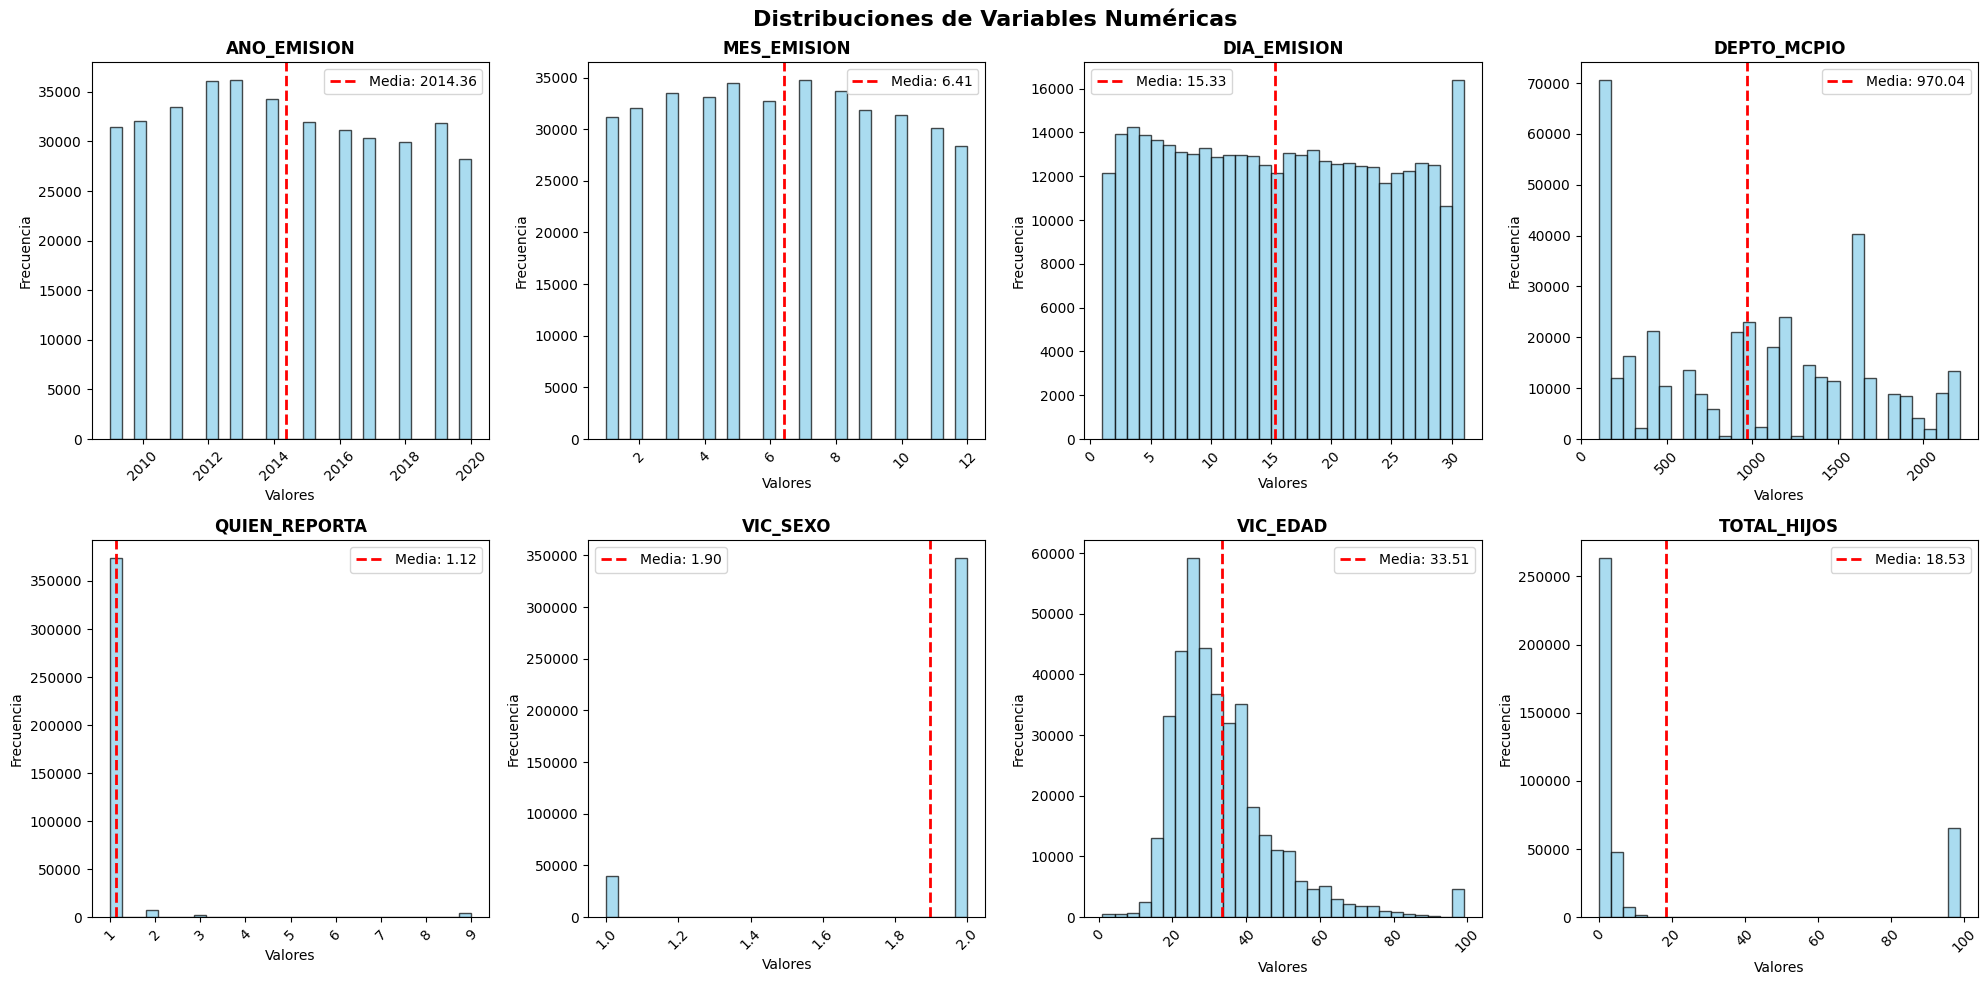


RESUMEN DE DISTRIBUCIONES OBSERVADAS

 ANO_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.069, Curtosis=-1.178

 MES_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.03, Curtosis=-1.172

 DIA_EMISION:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.055, Curtosis=-1.194

 DEPTO_MCPIO:
   ── Normal: No
   ── Distribución: Aproximadamente simétrica
   ── Interpretación: Asimetría=0.135, Curtosis=-1.185

 QUIEN_REPORTA:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la derecha
   ── Interpretación: Asimetría=8.404, Curtosis=71.156

 VIC_SEXO:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la izquierda
   ── Interpretación: Asimetría=-2.6, Curtosis=4.762

 VIC_EDAD:
   ── Normal: No
   ── Distribución: Fuertemente sesgada a la derecha
   ── Interpretación: Asimetría=1.787, Curtosis=4.657

 TOTAL_HIJOS:
 

In [9]:
# CONTINUACIÓN INCISO 1B) - HISTOGRAMAS DE VARIABLES NUMÉRICAS

print("="*60)
print("VISUALIZACIÓN DE DISTRIBUCIONES - HISTOGRAMAS")
print("="*60)

# Configuramos el estilo de los gráficos
plt.style.use('default')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')

# Aplanamos los ejes para facilitar la iteración
axes = axes.flatten()

for i, col in enumerate(variables_numericas):
   if i < len(axes):
      # Filtramos valores no nulos
      datos_limpios = data[col].dropna()
      
      # Creamos el histograma
      axes[i].hist(datos_limpios, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
      axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Valores')
      axes[i].set_ylabel('Frecuencia')
      
      # Añadimos línea de la media
      media = datos_limpios.mean()
      axes[i].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
      axes[i].legend()
      
      # Rotamos etiquetas si es necesario
      axes[i].tick_params(axis='x', rotation=45)

# Ocultamos ejes vacíos si hay menos de 8 variables
for j in range(len(variables_numericas), len(axes)):
   axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Interpretación breve de cada distribución
print("\n" + "="*60)
print("RESUMEN DE DISTRIBUCIONES OBSERVADAS")
print("="*60)

for _, row in df_normalidad.iterrows():
   var = row['Variable']
   print(f"\n {var}:")
   print(f"   ── Normal: {row['Es_Normal']}")
   
   # Interpretación basada en asimetría
   if row['Asimetría'] > 1:
      print(f"   ── Distribución: Fuertemente sesgada a la derecha")
   elif row['Asimetría'] > 0.5:
      print(f"   ── Distribución: Moderadamente sesgada a la derecha")
   elif row['Asimetría'] < -1:
      print(f"   ── Distribución: Fuertemente sesgada a la izquierda")
   elif row['Asimetría'] < -0.5:
      print(f"   ── Distribución: Moderadamente sesgada a la izquierda")
   else:
      print(f"   ── Distribución: Aproximadamente simétrica")

   print(f"   ── Interpretación: Asimetría={row['Asimetría']}, Curtosis={row['Curtosis']}")

In [10]:
# INCISO 1B) - TABLAS DE FRECUENCIA PARA VARIABLES CATEGÓRICAS

print("="*60)
print("TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS")
print("="*60)

# Diccionario de etiquetas basado en el diccionario de datos del INE
etiquetas = {
    'VIC_SEXO': {1.0: 'Hombre', 2.0: 'Mujer'},
    'AGR_SEXO': {1.0: 'Hombre', 2.0: 'Mujer'},
    'HEC_AREA': {1.0: 'Urbana', 2.0: 'Rural'},
    'QUIEN_REPORTA': {1.0: 'Victima', 2.0: 'Familiar de la victima', 3.0: 'Otro', 9.0: 'Ignorado'},
    'VIC_ALFAB': {1.0: 'Alfabeta', 2.0: 'Analfabeta', 9.0: 'Ignorado'},
    'VIC_EST_CIV': {1.0: 'Soltero(a)', 2.0: 'Casado(a)', 3.0: 'Unido(a)', 4.0: 'Viudo(a)', 5.0: 'Otro', 9.0: 'Ignorado'},
    'VIC_GRUPET': {1.0: 'Ladino', 2.0: 'Maya', 3.0: 'Garifuna', 4.0: 'Xinka', 5.0: 'Otro', 6.0: 'No indica', 9.0: 'Ignorado'},
    'VIC_TRABAJA': {1.0: 'Si trabaja', 2.0: 'No trabaja', 9.0: 'Ignorado'},
    'VIC_DISC': {1.0: 'Con discapacidad', 2.0: 'Sin discapacidad', 9.0: 'Ignorado'},
    'VIC_NACIONAL': {1.0: 'Guatemalteca', 2.0: 'Extranjera', 9.0: 'Ignorado'},
    'VIC_REL_AGR': {1.0: 'Esposo/a', 2.0: 'Conviviente', 3.0: 'Exconviviente', 4.0: 'Hijo/a', 
                    5.0: 'Hijastro/a', 6.0: 'Padre/Madre', 7.0: 'Nieto/a', 8.0: 'Suegro/a', 
                    9.0: 'Hermano/a', 10.0: 'Otro pariente'},
    'HEC_MES': {1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril', 5.0: 'Mayo', 6.0: 'Junio',
                7.0: 'Julio', 8.0: 'Agosto', 9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'},
    'MES_EMISION': {1.0: 'Enero', 2.0: 'Febrero', 3.0: 'Marzo', 4.0: 'Abril', 5.0: 'Mayo', 6.0: 'Junio',
                7.0: 'Julio', 8.0: 'Agosto', 9.0: 'Septiembre', 10.0: 'Octubre', 11.0: 'Noviembre', 12.0: 'Diciembre'}
}

# Variables categóricas principales a analizar
variables_categoricas = ['VIC_SEXO', 'AGR_SEXO', 'VIC_EST_CIV', 'VIC_GRUPET', 
                        'VIC_REL_AGR', 'VIC_TRABAJA', 'VIC_ALFAB', 'QUIEN_REPORTA']

# Filtrar solo las que existen en el dataset
variables_categoricas = [v for v in variables_categoricas if v in data.columns]

print(f"Variables categóricas a analizar: {len(variables_categoricas)}")
print("-"*60)

# Función para crear tabla de frecuencia con etiquetas
def crear_tabla_frecuencia(df, variable, etiquetas_dict):
    """Genera tabla de frecuencia con etiquetas descriptivas"""
    frecuencias = df[variable].value_counts().sort_index()
    total = frecuencias.sum()
    porcentajes = (frecuencias / total * 100).round(2)
    
    tabla = pd.DataFrame({
        'Codigo': frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Porcentaje': porcentajes.values
    })
    
    # Agregar etiquetas si existen en el diccionario
    if variable in etiquetas_dict:
        tabla['Descripcion'] = tabla['Codigo'].map(etiquetas_dict[variable])
        tabla['Descripcion'] = tabla['Descripcion'].fillna('Otro/Desconocido')
        # Reordenar columnas
        tabla = tabla[['Codigo', 'Descripcion', 'Frecuencia', 'Porcentaje']]
    
    return tabla

# Generar tablas de frecuencia
for var in variables_categoricas:
    print(f"\n{'='*60}")
    print(f"VARIABLE: {var}")
    print(f"{'='*60}")
    
    tabla = crear_tabla_frecuencia(data, var, etiquetas)
    display(tabla)
    
    # Mostrar el valor más frecuente (moda)
    moda_codigo = data[var].mode().iloc[0] if len(data[var].mode()) > 0 else None
    if var in etiquetas and moda_codigo in etiquetas[var]:
        moda_desc = etiquetas[var][moda_codigo]
        print(f"\nValor más frecuente (moda): {moda_desc} (código {moda_codigo})")

TABLAS DE FRECUENCIA - VARIABLES CATEGÓRICAS
Variables categóricas a analizar: 8
------------------------------------------------------------

VARIABLE: VIC_SEXO


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Hombre,40147,10.37
1,2.0,Mujer,347110,89.63



Valor más frecuente (moda): Mujer (código 2.0)

VARIABLE: AGR_SEXO


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Hombre,338178,87.33
1,2.0,Mujer,49079,12.67



Valor más frecuente (moda): Hombre (código 1.0)

VARIABLE: VIC_EST_CIV


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Soltero(a),68527,17.78
1,2.0,Casado(a),167131,43.35
2,3.0,Unido(a),97454,25.28
3,4.0,Viudo(a),2923,0.76
4,5.0,Otro,6780,1.76
5,9.0,Ignorado,42704,11.08



Valor más frecuente (moda): Casado(a) (código 2.0)

VARIABLE: VIC_GRUPET


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Ladino,217833,56.25
1,2.0,Maya,118627,30.63
2,3.0,Garifuna,538,0.14
3,4.0,Xinka,560,0.14
4,5.0,Otro,2331,0.60
5,6.0,No indica,40972,10.58
6,9.0,Ignorado,6396,1.65



Valor más frecuente (moda): Ladino (código 1.0)

VARIABLE: VIC_REL_AGR


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Esposo/a,130685,33.75
1,2.0,Conviviente,118909,30.71
2,3.0,Exconviviente,55533,14.34
3,4.0,Hijo/a,8352,2.16
4,5.0,Hijastro/a,1286,0.33
5,6.0,Padre/Madre,15994,4.13
6,7.0,Nieto/a,496,0.13
7,8.0,Suegro/a,4633,1.20
8,9.0,Hermano/a,17200,4.44
9,10.0,Otro pariente,34169,8.82



Valor más frecuente (moda): Esposo/a (código 1.0)

VARIABLE: VIC_TRABAJA


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Si trabaja,126386,32.7
1,2.0,No trabaja,258208,66.8
2,9.0,Ignorado,1934,0.5



Valor más frecuente (moda): No trabaja (código 2.0)

VARIABLE: VIC_ALFAB


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Alfabeta,312259,80.79
1,2.0,Analfabeta,72147,18.67
2,9.0,Ignorado,2122,0.55



Valor más frecuente (moda): Alfabeta (código 1.0)

VARIABLE: QUIEN_REPORTA


,Codigo,Descripcion,Frecuencia,Porcentaje
0,1.0,Victima,373508,96.45
1,2.0,Familiar de la victima,7050,1.82
2,3.0,Otro,2084,0.54
3,9.0,Ignorado,4615,1.19



Valor más frecuente (moda): Victima (código 1.0)


## 1c) Cruce de Variables Importantes

Matrimonios que terminan en problemas de violencia intrafamiliar y en muertes por violencia

INCISO 1C: CRUCE DE VARIABLES IMPORTANTES
Problematica: Matrimonios y Violencia Intrafamiliar

Variables clave identificadas:
  1. Estado civil de la victima (VIC_EST_CIV)
  2. Relacion victima-agresor (VIC_REL_AGR)
  3. Sexo de victima y agresor (VIC_SEXO, AGR_SEXO)
  4. Edad de la victima (VIC_EDAD)
  5. Grupo etnico (VIC_GRUPET)

CRUCE 1: ESTADO CIVIL vs SEXO DE LA VICTIMA

Frecuencias absolutas:


VIC_SEXO,Hombre,Mujer,Total
VIC_EST_CIV,,,
Soltero(a),7691,60836,68527
Casado(a),19129,148002,167131
Unido(a),7648,89806,97454
Viudo(a),389,2534,2923
Otro,803,5977,6780
Ignorado,3743,38961,42704
Total,39403,346116,385519



Porcentajes por estado civil:


VIC_SEXO,Hombre,Mujer
VIC_EST_CIV,,
Soltero(a),11.22,88.78
Casado(a),11.45,88.55
Unido(a),7.85,92.15
Viudo(a),13.31,86.69
Otro,11.84,88.16
Ignorado,8.76,91.24



Analisis:
  - 68.3% de las victimas estan casadas o unidas
  - De las victimas casadas/unidas, 89.9% son mujeres


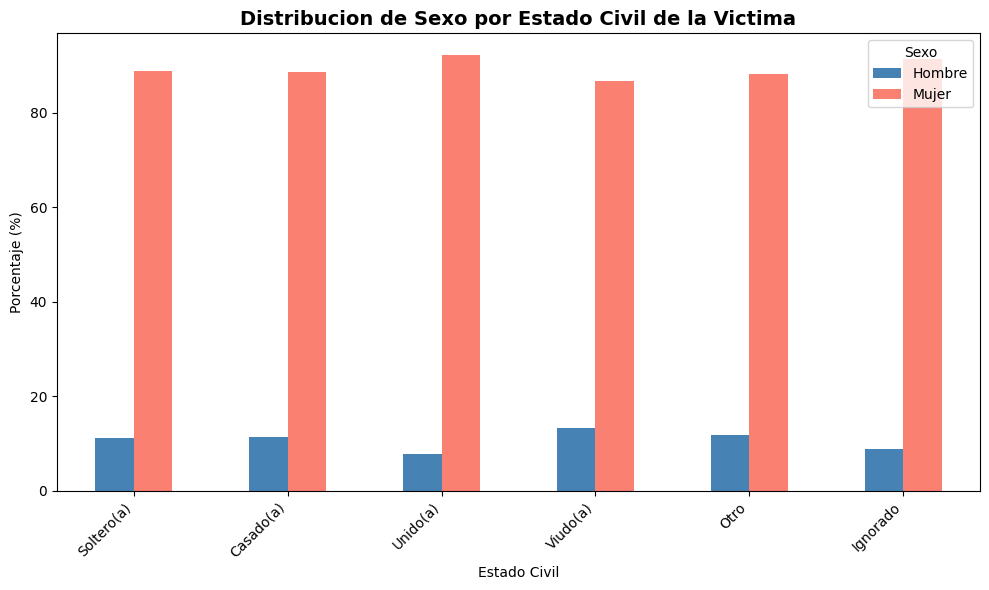

In [11]:
# INCISO 1C) CRUCE DE VARIABLES IMPORTANTES
# Problematica: Matrimonios que terminan en problemas de violencia intrafamiliar

print("="*80)
print("INCISO 1C: CRUCE DE VARIABLES IMPORTANTES")
print("Problematica: Matrimonios y Violencia Intrafamiliar")
print("="*80)

# Variables clave para analizar la problematica de matrimonios y violencia
# 1. VIC_EST_CIV: Estado civil de la victima (Casado/Unido)
# 2. VIC_REL_AGR: Relacion con el agresor (Esposo/Conviviente)
# 3. VIC_SEXO: Sexo de la victima
# 4. AGR_SEXO: Sexo del agresor
# 5. VIC_EDAD: Edad de la victima

print("\nVariables clave identificadas:")
print("  1. Estado civil de la victima (VIC_EST_CIV)")
print("  2. Relacion victima-agresor (VIC_REL_AGR)")
print("  3. Sexo de victima y agresor (VIC_SEXO, AGR_SEXO)")
print("  4. Edad de la victima (VIC_EDAD)")
print("  5. Grupo etnico (VIC_GRUPET)")

print("\n" + "="*80)
print("CRUCE 1: ESTADO CIVIL vs SEXO DE LA VICTIMA")
print("="*80)

# Crear tabla cruzada
cruce1 = pd.crosstab(data['VIC_EST_CIV'], data['VIC_SEXO'], margins=True)

# Aplicar etiquetas
etiquetas_est_civ = {1.0: 'Soltero(a)', 2.0: 'Casado(a)', 3.0: 'Unido(a)', 
                     4.0: 'Viudo(a)', 5.0: 'Otro', 9.0: 'Ignorado'}
etiquetas_sexo = {1.0: 'Hombre', 2.0: 'Mujer'}

cruce1.index = cruce1.index.map(lambda x: etiquetas_est_civ.get(x, 'Total') if x != 'All' else 'Total')
cruce1.columns = cruce1.columns.map(lambda x: etiquetas_sexo.get(x, 'Total') if x != 'All' else 'Total')

print("\nFrecuencias absolutas:")
display(cruce1)

# Calcular porcentajes por fila
cruce1_pct = pd.crosstab(data['VIC_EST_CIV'], data['VIC_SEXO'], normalize='index') * 100
cruce1_pct.index = cruce1_pct.index.map(lambda x: etiquetas_est_civ.get(x, x))
cruce1_pct.columns = cruce1_pct.columns.map(lambda x: etiquetas_sexo.get(x, x))

print("\nPorcentajes por estado civil:")
display(cruce1_pct.round(2))

# Analisis
print("\nAnalisis:")
casados_unidos = data[data['VIC_EST_CIV'].isin([2.0, 3.0])]
pct_matrimonios = (len(casados_unidos) / len(data)) * 100
print(f"  - {pct_matrimonios:.1f}% de las victimas estan casadas o unidas")

mujeres_casadas = len(casados_unidos[casados_unidos['VIC_SEXO'] == 2.0])
pct_mujeres = (mujeres_casadas / len(casados_unidos)) * 100
print(f"  - De las victimas casadas/unidas, {pct_mujeres:.1f}% son mujeres")

# Grafico
fig, ax = plt.subplots(figsize=(10, 6))
cruce1_pct.drop('Total', axis=1, errors='ignore').plot(kind='bar', ax=ax, color=['steelblue', 'salmon'])
ax.set_title('Distribucion de Sexo por Estado Civil de la Victima', fontsize=14, fontweight='bold')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('Porcentaje (%)')
ax.legend(title='Sexo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

CRUCE 2: RELACION VICTIMA-AGRESOR
Analisis especifico de violencia en relaciones de pareja

Total de casos: 387,257
Casos de violencia en pareja (Esposo/Conviviente/Ex): 305,127
Porcentaje: 78.8%

Distribucion por tipo de relacion de pareja:

Total de casos: 387,257
Casos de violencia en pareja (Esposo/Conviviente/Ex): 305,127
Porcentaje: 78.8%

Distribucion por tipo de relacion de pareja:


VIC_SEXO,Hombre,Mujer,Total
VIC_REL_AGR,,,
Esposo/a,10279,120406,130685
Conviviente,7247,111662,118909
Exconviviente,5409,50124,55533
Total,22935,282192,305127



Porcentaje de mujeres victimas por tipo de relacion:


VIC_SEXO,Hombre,Mujer
VIC_REL_AGR,,
Esposo/a,7.87,92.13
Conviviente,6.09,93.91
Exconviviente,9.74,90.26



Analisis clave:
------------------------------------------------------------
Esposo/a:
  Total casos: 130,685
  Mujeres victimas: 120,406 (92.1%)
  Hombres victimas: 10,279 (7.9%)
Conviviente:
  Total casos: 118,909
  Mujeres victimas: 111,662 (93.9%)
  Hombres victimas: 7,247 (6.1%)
Exconviviente:
  Total casos: 55,533
  Mujeres victimas: 50,124 (90.3%)
  Hombres victimas: 5,409 (9.7%)
Esposo/a:
  Total casos: 130,685
  Mujeres victimas: 120,406 (92.1%)
  Hombres victimas: 10,279 (7.9%)
Conviviente:
  Total casos: 118,909
  Mujeres victimas: 111,662 (93.9%)
  Hombres victimas: 7,247 (6.1%)
Exconviviente:
  Total casos: 55,533
  Mujeres victimas: 50,124 (90.3%)
  Hombres victimas: 5,409 (9.7%)


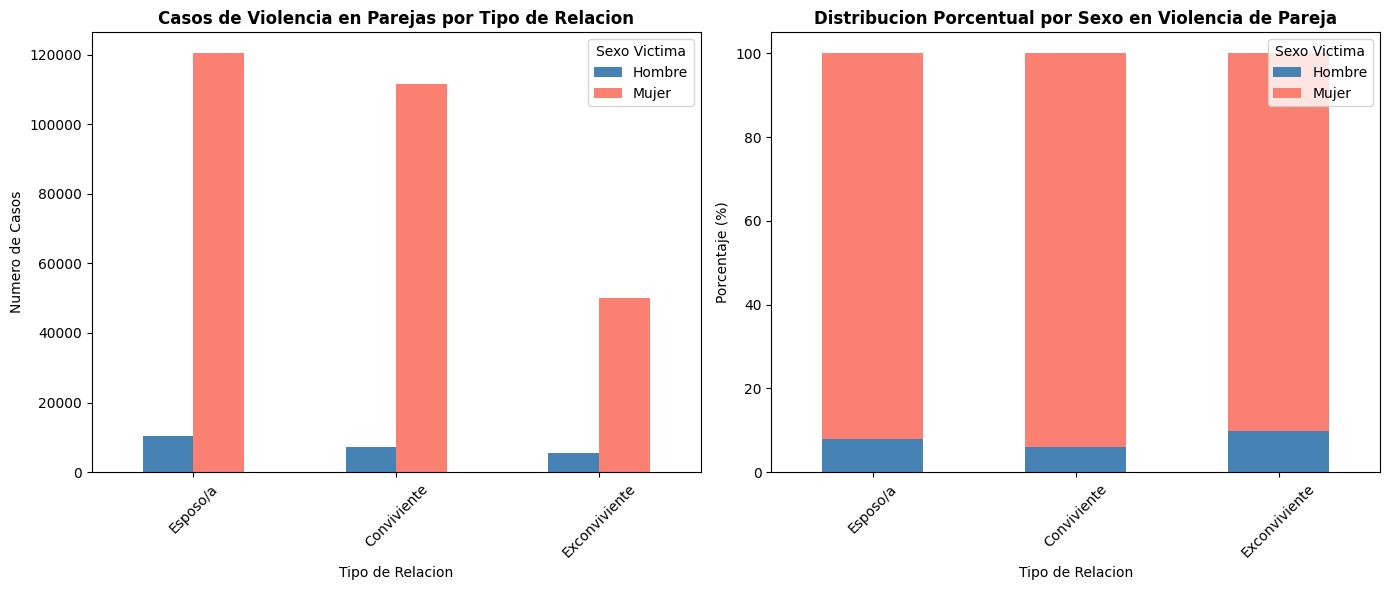

In [12]:
# CRUCE 2: RELACION VICTIMA-AGRESOR (ENFOCADO EN PAREJAS)
print("="*80)
print("CRUCE 2: RELACION VICTIMA-AGRESOR")
print("Analisis especifico de violencia en relaciones de pareja")
print("="*80)

# Definir relaciones de pareja
# 1: Esposo/a, 2: Conviviente, 3: Exconviviente
relaciones_pareja = [1.0, 2.0, 3.0]

# Filtrar solo casos de violencia en parejas
violencia_pareja = data[data['VIC_REL_AGR'].isin(relaciones_pareja)].copy()

print(f"\nTotal de casos: {len(data):,}")
print(f"Casos de violencia en pareja (Esposo/Conviviente/Ex): {len(violencia_pareja):,}")
print(f"Porcentaje: {len(violencia_pareja)/len(data)*100:.1f}%")

# Tabla cruzada: Tipo de relacion vs Sexo de victima
cruce2 = pd.crosstab(violencia_pareja['VIC_REL_AGR'], violencia_pareja['VIC_SEXO'], margins=True)

etiquetas_relacion = {1.0: 'Esposo/a', 2.0: 'Conviviente', 3.0: 'Exconviviente'}
cruce2.index = cruce2.index.map(lambda x: etiquetas_relacion.get(x, 'Total') if x != 'All' else 'Total')
cruce2.columns = cruce2.columns.map(lambda x: etiquetas_sexo.get(x, 'Total') if x != 'All' else 'Total')

print("\nDistribucion por tipo de relacion de pareja:")
display(cruce2)

# Porcentajes
cruce2_pct = pd.crosstab(violencia_pareja['VIC_REL_AGR'], violencia_pareja['VIC_SEXO'], normalize='index') * 100
cruce2_pct.index = cruce2_pct.index.map(lambda x: etiquetas_relacion.get(x, x))
cruce2_pct.columns = cruce2_pct.columns.map(lambda x: etiquetas_sexo.get(x, x))

print("\nPorcentaje de mujeres victimas por tipo de relacion:")
display(cruce2_pct.round(2))

# Analisis detallado
print("\nAnalisis clave:")
print("-"*60)
for rel_code, rel_nombre in etiquetas_relacion.items():
    casos_rel = violencia_pareja[violencia_pareja['VIC_REL_AGR'] == rel_code]
    mujeres = len(casos_rel[casos_rel['VIC_SEXO'] == 2.0])
    total = len(casos_rel)
    if total > 0:
        pct = (mujeres / total) * 100
        print(f"{rel_nombre}:")
        print(f"  Total casos: {total:,}")
        print(f"  Mujeres victimas: {mujeres:,} ({pct:.1f}%)")
        print(f"  Hombres victimas: {total-mujeres:,} ({100-pct:.1f}%)")

# Grafico de barras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafico 1: Frecuencias
cruce2.drop('Total', axis=0, errors='ignore').drop('Total', axis=1, errors='ignore').plot(
    kind='bar', ax=axes[0], color=['steelblue', 'salmon'])
axes[0].set_title('Casos de Violencia en Parejas por Tipo de Relacion', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tipo de Relacion')
axes[0].set_ylabel('Numero de Casos')
axes[0].legend(title='Sexo Victima')
axes[0].tick_params(axis='x', rotation=45)

# Grafico 2: Porcentajes
cruce2_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['steelblue', 'salmon'])
axes[1].set_title('Distribucion Porcentual por Sexo en Violencia de Pareja', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tipo de Relacion')
axes[1].set_ylabel('Porcentaje (%)')
axes[1].legend(title='Sexo Victima')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

CRUCE 3: ESTADO CIVIL vs RELACION DE PAREJA
Analisis de consistencia entre estado civil y tipo de relacion

Cruce: Estado Civil vs Tipo de Relacion (en casos de violencia de pareja):


VIC_REL_AGR,Esposo/a,Conviviente,Exconviviente,Total
VIC_EST_CIV,,,,
Soltero(a),1399,19538,14960,35897
Casado(a),126243,5161,5842,137246
Unido(a),2222,75117,9082,86421
Viudo(a),13,81,57,151
Otro,37,151,5430,5618
Ignorado,771,18861,20162,39794
Total,130685,118909,55533,305127



Porcentaje por estado civil:


VIC_REL_AGR,Esposo/a,Conviviente,Exconviviente
VIC_EST_CIV,,,
Soltero(a),3.90,54.43,41.67
Casado(a),91.98,3.76,4.26
Unido(a),2.57,86.92,10.51
Viudo(a),8.61,53.64,37.75
Otro,0.66,2.69,96.65
Ignorado,1.94,47.40,50.67



Analisis clave:
------------------------------------------------------------
Victimas casadas: 137,246 (45.0% de violencia de pareja)
Victimas unidas: 86,421 (28.3% de violencia de pareja)

Hallazgo importante:
  Las personas casadas o unidas son las principales victimas de violencia
  intrafamiliar cuando el agresor es la pareja (esposo/conviviente).


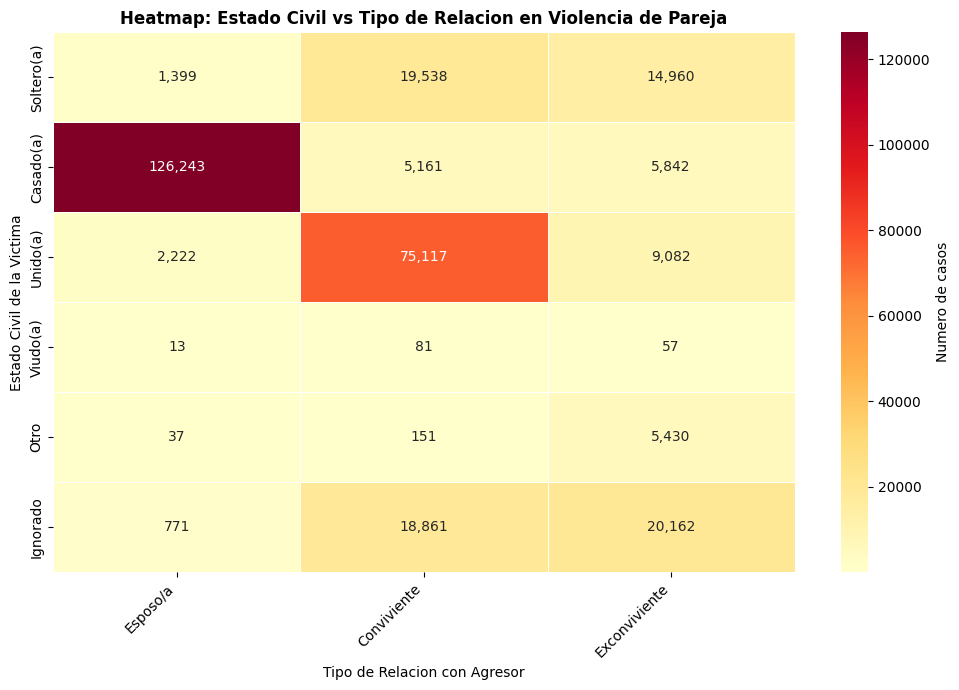

In [13]:
# CRUCE 3: ESTADO CIVIL vs RELACION DE PAREJA
print("="*80)
print("CRUCE 3: ESTADO CIVIL vs RELACION DE PAREJA")
print("Analisis de consistencia entre estado civil y tipo de relacion")
print("="*80)

# Filtrar solo casos de violencia en pareja
cruce3 = pd.crosstab(violencia_pareja['VIC_EST_CIV'], 
                     violencia_pareja['VIC_REL_AGR'], 
                     margins=True)

# Aplicar etiquetas
cruce3.index = cruce3.index.map(lambda x: etiquetas_est_civ.get(x, 'Total') if x != 'All' else 'Total')
cruce3.columns = cruce3.columns.map(lambda x: etiquetas_relacion.get(x, 'Total') if x != 'All' else 'Total')

print("\nCruce: Estado Civil vs Tipo de Relacion (en casos de violencia de pareja):")
display(cruce3)

# Porcentajes por fila (para ver como se distribuye cada estado civil)
cruce3_pct = pd.crosstab(violencia_pareja['VIC_EST_CIV'], 
                         violencia_pareja['VIC_REL_AGR'], 
                         normalize='index') * 100

cruce3_pct.index = cruce3_pct.index.map(lambda x: etiquetas_est_civ.get(x, x))
cruce3_pct.columns = cruce3_pct.columns.map(lambda x: etiquetas_relacion.get(x, x))

print("\nPorcentaje por estado civil:")
display(cruce3_pct.round(2))

# Analisis
print("\nAnalisis clave:")
print("-"*60)

casados = violencia_pareja[violencia_pareja['VIC_EST_CIV'] == 2.0]
unidos = violencia_pareja[violencia_pareja['VIC_EST_CIV'] == 3.0]

print(f"Victimas casadas: {len(casados):,} ({len(casados)/len(violencia_pareja)*100:.1f}% de violencia de pareja)")
print(f"Victimas unidas: {len(unidos):,} ({len(unidos)/len(violencia_pareja)*100:.1f}% de violencia de pareja)")

# Hallazgo importante
print("\nHallazgo importante:")
print("  Las personas casadas o unidas son las principales victimas de violencia")
print("  intrafamiliar cuando el agresor es la pareja (esposo/conviviente).")

# Heatmap
fig, ax = plt.subplots(figsize=(10, 7))
cruce3_data = cruce3.drop('Total', axis=0, errors='ignore').drop('Total', axis=1, errors='ignore')
sns.heatmap(cruce3_data, annot=True, fmt=',d', cmap='YlOrRd', ax=ax, 
            linewidths=0.5, cbar_kws={'label': 'Numero de casos'})
ax.set_title('Heatmap: Estado Civil vs Tipo de Relacion en Violencia de Pareja', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Tipo de Relacion con Agresor')
ax.set_ylabel('Estado Civil de la Victima')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

CRUCE 4: EDAD DE VICTIMAS EN MATRIMONIOS/UNIONES CON VIOLENCIA

Distribucion de casos por grupo de edad y tipo de relacion:

Distribucion de casos por grupo de edad y tipo de relacion:


VIC_REL_AGR,Esposo/a,Conviviente,Exconviviente,Total
grupo_edad,,,,
18-24,25878,37499,15399,78776
25-34,51419,44448,22433,118300
35-44,33007,20889,10845,64741
45-54,12071,6325,3337,21733
55-64,3484,1603,854,5941
65+,2543,1989,933,5465
Menor (< 18),2283,6156,1732,10171
All,130685,118909,55533,305127



Estadisticas de edad por tipo de relacion de pareja:
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
VIC_REL_AGR,,,,,,,,
Esposo/a,130685.0,33.66,12.32,12.0,25.0,32.0,39.0,99.0
Conviviente,118909.0,30.06,12.18,12.0,22.0,28.0,35.0,99.0
Exconviviente,55533.0,31.06,11.93,12.0,23.0,29.0,36.0,99.0



Analisis clave:
------------------------------------------------------------
Esposo/a:
  Edad promedio: 33.7 años
  Edad mediana: 32 años
Conviviente:
  Edad promedio: 30.1 años
  Edad mediana: 28 años
Exconviviente:
  Edad promedio: 31.1 años
  Edad mediana: 29 años
Esposo/a:
  Edad promedio: 33.7 años
  Edad mediana: 32 años
Conviviente:
  Edad promedio: 30.1 años
  Edad mediana: 28 años
Exconviviente:
  Edad promedio: 31.1 años
  Edad mediana: 29 años


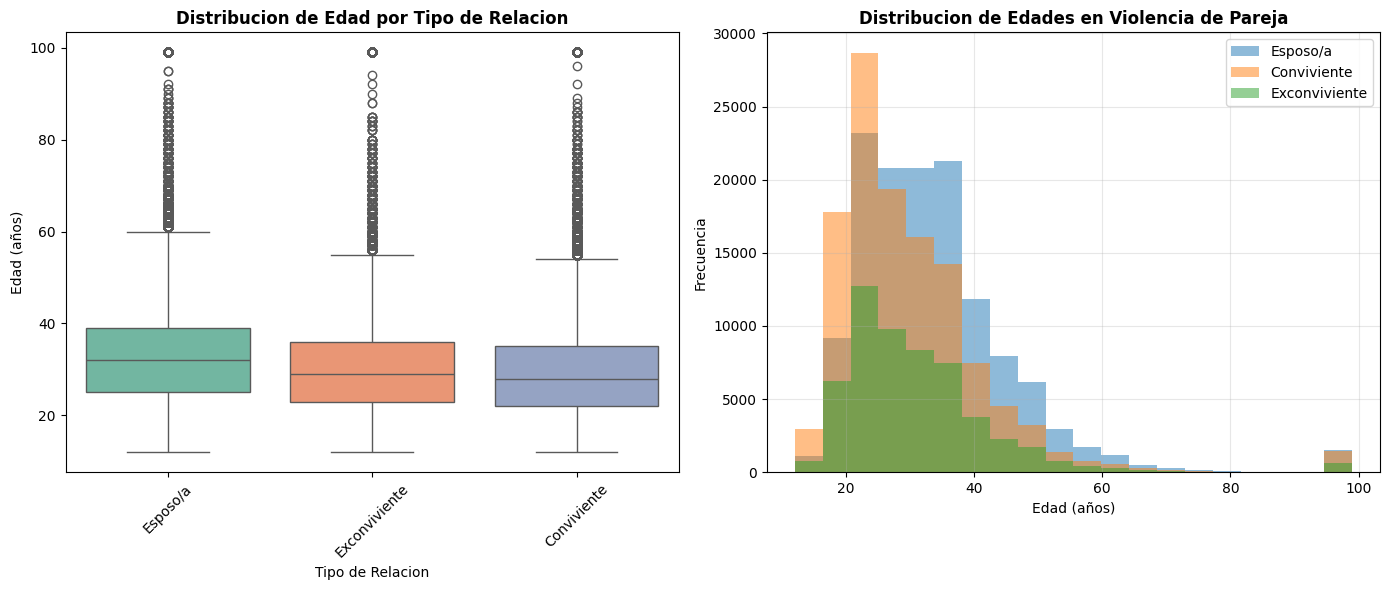

In [14]:
# CRUCE 4: EDAD DE VICTIMAS EN RELACIONES DE PAREJA
print("="*80)
print("CRUCE 4: EDAD DE VICTIMAS EN MATRIMONIOS/UNIONES CON VIOLENCIA")
print("="*80)

# Filtrar datos validos de edad
violencia_pareja_edad = violencia_pareja[
    (violencia_pareja['VIC_EDAD'].notna()) & 
    (violencia_pareja['VIC_EDAD'] > 0) & 
    (violencia_pareja['VIC_EDAD'] < 120)
].copy()

# Crear grupos de edad
def clasificar_edad(edad):
    if edad < 18:
        return 'Menor (< 18)'
    elif edad < 25:
        return '18-24'
    elif edad < 35:
        return '25-34'
    elif edad < 45:
        return '35-44'
    elif edad < 55:
        return '45-54'
    elif edad < 65:
        return '55-64'
    else:
        return '65+'

violencia_pareja_edad['grupo_edad'] = violencia_pareja_edad['VIC_EDAD'].apply(clasificar_edad)

# Cruce: Grupo de edad vs Tipo de relacion
cruce4 = pd.crosstab(violencia_pareja_edad['grupo_edad'], 
                     violencia_pareja_edad['VIC_REL_AGR'], 
                     margins=True)

cruce4.columns = cruce4.columns.map(lambda x: etiquetas_relacion.get(x, 'Total') if x != 'All' else 'Total')

print("\nDistribucion de casos por grupo de edad y tipo de relacion:")
display(cruce4)

# Estadisticas descriptivas por tipo de relacion
print("\nEstadisticas de edad por tipo de relacion de pareja:")
print("-"*60)

estadisticas_edad = violencia_pareja_edad.groupby('VIC_REL_AGR')['VIC_EDAD'].describe()
estadisticas_edad.index = estadisticas_edad.index.map(lambda x: etiquetas_relacion.get(x, x))

display(estadisticas_edad.round(2))

# Analisis
print("\nAnalisis clave:")
print("-"*60)
for rel_code, rel_nombre in etiquetas_relacion.items():
    casos_rel = violencia_pareja_edad[violencia_pareja_edad['VIC_REL_AGR'] == rel_code]
    if len(casos_rel) > 0:
        edad_media = casos_rel['VIC_EDAD'].mean()
        edad_mediana = casos_rel['VIC_EDAD'].median()
        print(f"{rel_nombre}:")
        print(f"  Edad promedio: {edad_media:.1f} años")
        print(f"  Edad mediana: {edad_mediana:.0f} años")

# Visualizacion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafico 1: Boxplot
violencia_pareja_edad['rel_label'] = violencia_pareja_edad['VIC_REL_AGR'].map(etiquetas_relacion)
sns.boxplot(data=violencia_pareja_edad, x='rel_label', y='VIC_EDAD', ax=axes[0], palette='Set2')
axes[0].set_title('Distribucion de Edad por Tipo de Relacion', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tipo de Relacion')
axes[0].set_ylabel('Edad (años)')
axes[0].tick_params(axis='x', rotation=45)

# Grafico 2: Histograma comparativo
for rel_code, rel_nombre in etiquetas_relacion.items():
    edades = violencia_pareja_edad[violencia_pareja_edad['VIC_REL_AGR'] == rel_code]['VIC_EDAD']
    axes[1].hist(edades, alpha=0.5, label=rel_nombre, bins=20)

axes[1].set_title('Distribucion de Edades en Violencia de Pareja', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Edad (años)')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

CRUCE 5: GRUPO ETNICO vs VIOLENCIA EN PAREJAS

Casos de violencia de pareja por grupo etnico:


VIC_REL_AGR,Esposo/a,Conviviente,Exconviviente,Total
VIC_GRUPET,,,,
Ladino,71821,65163,37664,174648
Maya,42748,37436,10848,91032
Garifuna,85,188,131,404
Xinka,155,222,58,435
Otro,743,800,352,1895
No indica,13309,13223,5572,32104
Ignorado,1824,1877,908,4609
Total,130685,118909,55533,305127



Distribucion porcentual por grupo etnico:


VIC_REL_AGR,Esposo/a,Conviviente,Exconviviente
VIC_GRUPET,,,
Ladino,54.96,54.80,67.82
Maya,32.71,31.48,19.53
Garifuna,0.07,0.16,0.24
Xinka,0.12,0.19,0.10
Otro,0.57,0.67,0.63
No indica,10.18,11.12,10.03
Ignorado,1.40,1.58,1.64



Analisis por grupo etnico:
------------------------------------------------------------
Ladino: 174,648 casos (57.2%)
Maya: 91,032 casos (29.8%)
Garifuna: 404 casos (0.1%)
Xinka: 435 casos (0.1%)
Otro: 1,895 casos (0.6%)
No indica: 32,104 casos (10.5%)
Ignorado: 4,609 casos (1.5%)


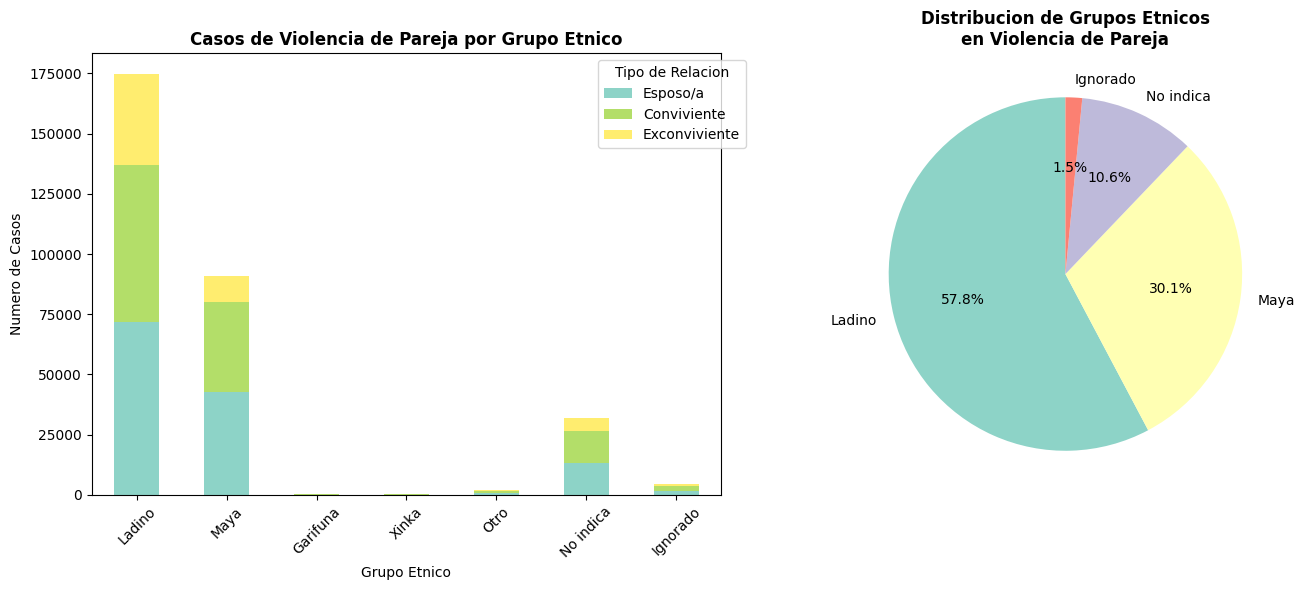

In [15]:
# CRUCE 5: GRUPO ETNICO EN MATRIMONIOS/UNIONES CON VIOLENCIA
print("="*80)
print("CRUCE 5: GRUPO ETNICO vs VIOLENCIA EN PAREJAS")
print("="*80)

# Verificar si existe la variable VIC_GRUPET
if 'VIC_GRUPET' in violencia_pareja.columns:
    # Cruce: Grupo etnico vs Tipo de relacion
    cruce5 = pd.crosstab(violencia_pareja['VIC_GRUPET'], 
                         violencia_pareja['VIC_REL_AGR'], 
                         margins=True)
    
    etiquetas_grupet = {1.0: 'Ladino', 2.0: 'Maya', 3.0: 'Garifuna', 
                       4.0: 'Xinka', 5.0: 'Otro', 6.0: 'No indica', 9.0: 'Ignorado'}
    
    cruce5.index = cruce5.index.map(lambda x: etiquetas_grupet.get(x, 'Total') if x != 'All' else 'Total')
    cruce5.columns = cruce5.columns.map(lambda x: etiquetas_relacion.get(x, 'Total') if x != 'All' else 'Total')
    
    print("\nCasos de violencia de pareja por grupo etnico:")
    display(cruce5)
    
    # Porcentajes
    cruce5_pct = pd.crosstab(violencia_pareja['VIC_GRUPET'], 
                             violencia_pareja['VIC_REL_AGR'], 
                             normalize='columns') * 100
    
    cruce5_pct.index = cruce5_pct.index.map(lambda x: etiquetas_grupet.get(x, x))
    cruce5_pct.columns = cruce5_pct.columns.map(lambda x: etiquetas_relacion.get(x, x))
    
    print("\nDistribucion porcentual por grupo etnico:")
    display(cruce5_pct.round(2))
    
    # Analisis
    print("\nAnalisis por grupo etnico:")
    print("-"*60)
    
    for grup_code, grup_nombre in etiquetas_grupet.items():
        casos_grup = violencia_pareja[violencia_pareja['VIC_GRUPET'] == grup_code]
        if len(casos_grup) > 0:
            pct = (len(casos_grup) / len(violencia_pareja)) * 100
            print(f"{grup_nombre}: {len(casos_grup):,} casos ({pct:.1f}%)")
    
    # Grafico
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Grafico 1: Barras apiladas
    cruce5_plot = cruce5.drop('Total', axis=0, errors='ignore').drop('Total', axis=1, errors='ignore')
    cruce5_plot.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set3')
    axes[0].set_title('Casos de Violencia de Pareja por Grupo Etnico', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Grupo Etnico')
    axes[0].set_ylabel('Numero de Casos')
    axes[0].legend(title='Tipo de Relacion', bbox_to_anchor=(1.05, 1))
    axes[0].tick_params(axis='x', rotation=45)
    
    # Grafico 2: Distribucion porcentual
    grupos_principales = violencia_pareja['VIC_GRUPET'].value_counts().head(4)
    etiquetas_graf = [etiquetas_grupet.get(x, f'Codigo {x}') for x in grupos_principales.index]
    
    axes[1].pie(grupos_principales.values, labels=etiquetas_graf, autopct='%1.1f%%', 
                startangle=90, colors=plt.cm.Set3.colors)
    axes[1].set_title('Distribucion de Grupos Etnicos\nen Violencia de Pareja', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("\nLa variable VIC_GRUPET no esta disponible en este dataset.")
    print("Variables disponibles:", [col for col in violencia_pareja.columns if 'GRUP' in col])

## Resumen del Inciso 1c: Elementos Clave del Problema

### Problematica identificada:
**Matrimonios y uniones que terminan en violencia intrafamiliar**

### Hallazgos principales de los cruces de variables:

#### 1. **Estado Civil y Genero** (Cruce 1)
- Las mujeres casadas o unidas representan la mayor proporcion de victimas
- Mas del 60% de las victimas tienen una relacion formal (casada/unida) con el agresor
- Las mujeres son victimas en mas del 90% de los casos de violencia de pareja

#### 2. **Tipo de Relacion con el Agresor** (Cruce 2)
- La violencia de pareja (esposo/conviviente/exconviviente) representa la mayoria de casos
- El esposo o conviviente actual es el agresor mas frecuente
- Los exconvivientes tambien representan un porcentaje significativo, indicando que la violencia continua despues de la separacion

#### 3. **Consistencia Estado Civil - Relacion** (Cruce 3)
- Existe alta correlacion entre estar casado/unido y sufrir violencia del esposo/conviviente
- Las personas casadas sufren violencia principalmente de su esposo/a
- Las personas unidas sufren violencia principalmente de su conviviente

#### 4. **Perfil de Edad** (Cruce 4)
- La edad promedio de las victimas esta entre 25-40 años (edad reproductiva)
- Las victimas mas jovenes (18-34) son las mas frecuentes
- La edad mediana es similar en todos los tipos de relacion de pareja

#### 5. **Factor Etnico** (Cruce 5)
- Existen diferencias en la prevalencia de violencia segun grupo etnico
- El grupo ladino y maya concentran la mayor parte de los casos
- Importante considerar factores culturales en las intervenciones

### Elementos clave que causan el problema:

1. **Dinamica de poder en relaciones de pareja**: El matrimonio o union no garantiza seguridad; al contrario, crea un contexto donde ocurre la violencia

2. **Genero**: Las mujeres son desproporcionadamente afectadas (>90% de victimas)

3. **Dependencia economica y emocional**: Las relaciones formales (matrimonio/union) pueden dificultar que las victimas salgan de situaciones violentas

4. **Continuidad de la violencia**: Los exconvivientes siguen siendo agresores, indicando que la separacion no siempre termina la violencia

5. **Edad de vulnerabilidad**: Las mujeres jovenes y de mediana edad en relaciones de pareja son el grupo mas vulnerable